In [ ]:
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator
import os
from os import walk

In [ ]:
def excel_to_pd(data_pd,data_pd_i,current_pd, cell_type, substance):

    for label, content in current_pd.items():
       

        data_pd_i['OD'] = content
        data_pd_i['Cell_type'] = cell_type
        data_pd_i['Substance'] = substance
        data_pd_i['Concentration'] = label

        data_pd = pd.concat([data_pd,data_pd_i])
    return data_pd

In [ ]:

folder_path = "D:\\Минин\\Converted\\Belskaya"

files = []
for (dirpath, dirnames, filenames) in walk(folder_path):
    for file in filenames:
        files.append(os.path.join(dirpath, file))

print(files)

In [ ]:
labels = {'OD':[],'Cell_type':[],'Substance':[],'Concentration':[]}
data_pd = pd.DataFrame(labels)
data_pd_i = pd.DataFrame(labels)

for file in files:
   file_name_ext = os.path.basename(file)
   file_name,extention = file_name_ext.split(".")

   file_raw = pd.read_excel(file) 

   data_pd = excel_to_pd(data_pd,data_pd_i,file_raw,'Vero',file_name)

print(data_pd)

In [ ]:
data_ext = data_pd[(data_pd['Cell_type'] == 'Vero')].copy()

sns.barplot(data = data_ext, x = 'Substance', y = 'OD', hue = 'Concentration')

Recalculation to relative values:

In [ ]:
data_ext = data_pd[(data_pd['Cell_type'] == 'Vero')].copy()
substances_list = data_pd['Substance'].unique()

labels = {'OD':[],'Relative':[],'Substance':[],'Concentration':[]}
data = pd.DataFrame(labels)

for substance in substances_list:
    data_i = data_ext[(data_ext['Substance'] == substance)]
    control_mean = data_i.loc[data_i['Concentration']=='Control', 'OD'].mean()
    data_i['Relative'] = data_i['OD']/control_mean*100
    data = pd.concat([data,data_i])
  
print(data)

In [85]:
unique_substances= data['Substance'].unique()
print(unique_substances)

extracted_data = data[(data['Substance'] == 'BNPGA-418') | (data['Substance'] == 'BNPGA-357')].copy()

unique_concentrations= extracted_data['Concentration'].unique()
unique_substances= extracted_data['Substance'].unique()

pairs = []
for subst in unique_substances:
    for conc in unique_concentrations:
        # if conc == 'Control':
        #     break
        pairs.append(((subst,conc),(subst,'Control')))
        

print(pairs)


['BNTM-349 UV' 'BNTM-349' 'BNTM-418 UV' 'BNTM-477 UV' 'BNTM-495'
 'BNTM-494' 'BNAB-110' 'BNPGA-330' 'BNPGA-422' 'BNPGA-528' 'Amb'
 'BNPGA-416' 'BNPGA-357' 'BNKV-267' 'BNPGA-418' 'BNPGA-477']
[(('BNPGA-357', '10-4'), ('BNPGA-357', 'Control')), (('BNPGA-357', '10-5'), ('BNPGA-357', 'Control')), (('BNPGA-357', '10-6'), ('BNPGA-357', 'Control')), (('BNPGA-357', 'Control'), ('BNPGA-357', 'Control')), (('BNPGA-418', '10-4'), ('BNPGA-418', 'Control')), (('BNPGA-418', '10-5'), ('BNPGA-418', 'Control')), (('BNPGA-418', '10-6'), ('BNPGA-418', 'Control')), (('BNPGA-418', 'Control'), ('BNPGA-418', 'Control'))]


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

BNPGA-357_Control vs. BNPGA-357_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.880e+02
BNPGA-418_Control vs. BNPGA-418_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=7.200e+01
BNPGA-418_10-6 vs. BNPGA-418_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=8.200e+01
BNPGA-357_10-6 vs. BNPGA-357_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=3.060e+02
BNPGA-357_10-5 vs. BNPGA-357_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=3.040e+02
BNPGA-418_10-5 vs. BNPGA-418_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.211e-03 U_stat=1.800e+

(<AxesSubplot: xlabel='Substance', ylabel='Viable cell, % of control'>,
  <statannotations.Annotation.Annotation at 0x23cd9b9c9a0>])

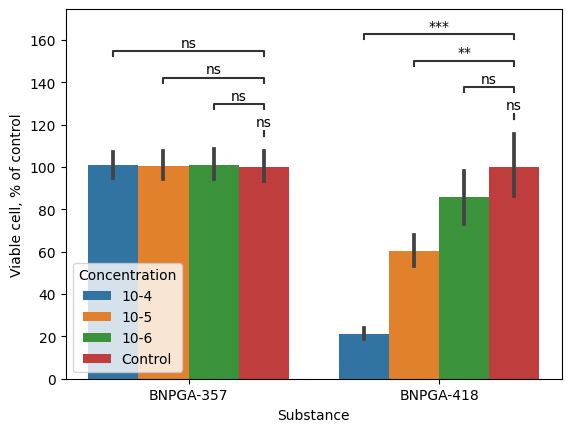

In [86]:
ax = sns.barplot(data = extracted_data, x = 'Substance', y = 'Relative', hue = 'Concentration')
ax.set(xlabel='Substance', ylabel='Viable cell, % of control')

annotator = Annotator(ax, pairs, data=extracted_data, x = 'Substance', y = 'Relative', hue = 'Concentration')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction="Bonferroni")
annotator.apply_and_annotate()

